In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [2]:
#Cargar los datos
df_respuestas = pd.read_csv('Base Datos - Tesis/t_respuestasnom35.csv', engine='python')
df_empleados = pd.read_csv('Base Datos - Tesis/t_empleadosnom35.csv', engine='python')

# Descubrir y Visualizar los datos para obtener información

In [3]:
#Mostrar las primeras filas
df_respuestas.head()

,Id_respuesta,Id_empleado_nom35,Id_res_nom35,respuesta,date
0,1,1,1,2,2019-06-10
1,2,1,2,2,2019-06-10
2,3,1,3,2,2019-06-10
3,4,1,4,2,2019-06-10
4,5,1,5,2,2019-06-10


In [4]:
#Mostrar las columnas
df_respuestas.columns.values

array(['Id_respuesta', 'Id_empleado_nom35', 'Id_res_nom35', 'respuesta',
       'date'], dtype=object)

In [5]:
#Mostrar el numero de filas y columnas
df_respuestas.shape

(1265984, 5)

In [6]:
#Mostrar el tipo de variables
df_respuestas.dtypes

Id_respuesta          int64
Id_empleado_nom35     int64
Id_res_nom35          int64
respuesta             int64
date                 object
dtype: object

In [7]:
#Visualizar los distintos tipos de respuestas de la norma 035 dada por empleados
df_respuestas['respuesta'].value_counts()

0    472517
2    317130
1    274435
3    104420
4     97481
6         1
Name: respuesta, dtype: int64

# Visualizacion de los datos de los Empleados

In [8]:
#Mostrar las primeras filas
df_empleados.head

<bound method NDFrame.head of        Id_Empleado                                             Nombre  \
0                1                                      Miguel Orozco   
1                2                                           Ejemplo1   
2                3                                            WangTsu   
3                4                                  Rodrigo Padilla 2   
4                5                                      Miriam Carlos   
...            ...                                                ...   
21119        21247  cb1b15500d18f8f93acb06e3b3779c0754811039a2c169...   
21120        21248  c8ca86bcb1b19554526877d3e8d8e3ddabba11144f35a9...   
21121        21249  c7ce4592cd5bfb617c911352d05f7d1550a0cf5ba6f53d...   
21122        21250  f860de2f24e1f55815a1e53c479d19d781712306cbf4cf...   
21123        21251  83bd54fe16181d08e658a5cb0b4ecc5ca936d67e75d37f...   

                                                   Email        Edad  \
0      e3b0c44298fc1c

In [9]:
#Mostrar las columnas
df_empleados.columns.values

array(['Id_Empleado', 'Nombre', 'Email', 'Edad', 'Genero', 'EstadoCivil',
       'NivelEstudios', 'Ocupacion', 'Departamento', 'TipoPuesto',
       'TipoContratacion', 'TipoPersonal', 'TipoJornada', 'Rotacion',
       'ExperienciaActual', 'ExperienciaTotal', 'PIN', 'Folio',
       'FechaRegistro', 'NombreSucursal', 'CPSucursal', 'Pagado', 'Nota'],
      dtype=object)

In [10]:
#Mostrar el numero de filas y columnas
df_empleados.shape

(21124, 23)

In [11]:
#Mostrar el tipo de variables
df_empleados.dtypes

Id_Empleado           int64
Nombre               object
Email                object
Edad                 object
Genero               object
EstadoCivil          object
NivelEstudios        object
Ocupacion            object
Departamento         object
TipoPuesto           object
TipoContratacion     object
TipoPersonal         object
TipoJornada          object
Rotacion             object
ExperienciaActual    object
ExperienciaTotal     object
PIN                  object
Folio                object
FechaRegistro        object
NombreSucursal       object
CPSucursal           object
Pagado               object
Nota                 object
dtype: object

# Preparar los datos para los algoritmos de Machine Learning

In [12]:
#Se borran las primeras 26 filas de los empleados y las filas que tengan un id de uno esos 26 empleados tambien se borra de las respuestas
#Se borran debido a que son datos de prueba o ejemplo
df_filtrado_respuestas=df_respuestas.drop(df_respuestas.index[df_respuestas.Id_empleado_nom35 <= 26], axis=0)
df_filtrado_empleados=df_empleados.drop(df_empleados.index[df_empleados.Id_Empleado <= 26], axis=0)

df_r=pd.DataFrame(df_filtrado_respuestas)
df_e=pd.DataFrame(df_filtrado_empleados)
df_e2=df_e.loc[:, ['Id_Empleado','Genero','EstadoCivil','NivelEstudios','Ocupacion','Departamento','TipoPuesto','TipoContratacion','TipoPersonal','TipoJornada','Rotacion','ExperienciaActual']]
df_r2=df_r.loc[:, :]

In [13]:
#Hacer copia con menos datos para un entrenamiento rapido, hasta el 65
df_r_prueba = df_r.drop(df_r.index[df_r.Id_empleado_nom35 > 65], axis=0)
df_e_prueba = df_e.drop(df_e.index[df_e.Id_Empleado > 65], axis=0)

In [14]:
#Para mostrar todos los datos de una tabla
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [15]:
#Se crea la columna Indice para agregar del 0 al numero total de filas menos una fila
df_r_prueba['Indice']=np.arange(len(df_r_prueba))
df_e_prueba['Indice']=np.arange(len(df_e_prueba))

In [16]:
df_e_prueba

,Id_Empleado,Nombre,Email,Edad,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,...,ExperienciaActual,ExperienciaTotal,PIN,Folio,FechaRegistro,NombreSucursal,CPSucursal,Pagado,Nota,Indice
25,27,64805e8771571d97e53c2bba8d6d29cab52ce2a30274aa...,64805e8771571d97e53c2bba8d6d29cab52ce2a30274aa...,1989-02-17,Masculino,Casado,Maestria,informatica,informatica,profesional,...,1A4A,10A14A,123abc,NaN,NaN,NaN,NaN,Gratis,NaN,0
26,29,9bab180b309ff8d9e3058c74a0d8f101d35b61d9041319...,9bab180b309ff8d9e3058c74a0d8f101d35b61d9041319...,1995-08-17,Masculino,Soltero,Licenciatura,innovacion,innovacion,gerente,...,1A4A,6M1A,8u3rq,NaN,NaN,NaN,NaN,Gratis,NaN,1
27,30,76ee4ab8668be0081c2e3a4fbf6b2f8f7642aedecbcfa1...,76ee4ab8668be0081c2e3a4fbf6b2f8f7642aedecbcfa1...,1967-03-20,Masculino,Soltero,SinFormacion,direccion,direccion,operativo,...,Menos6M,Menos6M,ypa5i,NaN,NaN,NaN,NaN,Gratis,NaN,2
28,31,b0e186d06d48670968a9c48267b75a69c3f2894147e8e0...,b0e186d06d48670968a9c48267b75a69c3f2894147e8e0...,1979-11-03,Masculino,Soltero,Licenciatura,otros,otros,otro,...,5A9A,5A9A,8bwyp,NaN,NaN,NaN,NaN,Gratis,NaN,3
29,44,733c498ffe3e81d930968947764559d5d0f2a00d8c125e...,733c498ffe3e81d930968947764559d5d0f2a00d8c125e...,1964-10-20,Femenino,Casado,Licenciatura,direccion,direccion,otro,...,15A19A,20A24A,vinxd,NaN,NaN,NaN,NaN,Gratis,NaN,4
30,53,07d0e91757e34c52b48c60ecd145b7ecdeb96c71c54af4...,07d0e91757e34c52b48c60ecd145b7ecdeb96c71c54af4...,1982-08-21,Femenino,Soltero,Licenciatura,direccion,direccion,gerente,...,1A4A,5A9A,8rhdw,NaN,NaN,NaN,NaN,Gratis,NaN,5
31,54,6a56864c551b9c9638353850081a5fc22f83401723dfa8...,6a56864c551b9c9638353850081a5fc22f83401723dfa8...,2019-07-24,Femenino,Casado,Licenciatura,serviciosgenerales,serviciosgenerales,operativo,...,1A4A,1A4A,8rhdw,NaN,NaN,NaN,NaN,Gratis,NaN,6
32,55,d3b0b00b92aacd4ca229c5bc3e845b05134e1619df854e...,d3b0b00b92aacd4ca229c5bc3e845b05134e1619df854e...,2019-07-03,Masculino,UnionLibre,SinFormacion,marketing,marketing,operativo,...,6M1A,10A14A,123abc,NaN,NaN,NaN,NaN,Gratis,NaN,7
33,58,6bbaa049c31cafbd8ed608d0cbb285f3683dfb774a2f4b...,6bbaa049c31cafbd8ed608d0cbb285f3683dfb774a2f4b...,1975-02-17,Masculino,Soltero,TecnicoSuperior,direccion,direccion,operativo,...,Menos6M,Menos6M,123abc,NaN,NaN,NaN,NaN,Gratis,NaN,8
34,59,c2d37d1b4e37ddb3bb0c6d4fbf4abcadcf5b54a3b282a4...,c2d37d1b4e37ddb3bb0c6d4fbf4abcadcf5b54a3b282a4...,1972-08-01,Masculino,Casado,Licenciatura,administracion,administracion,gerente,...,15A19A,15A19A,ayw2v,NaN,NaN,NaN,NaN,Gratis,NaN,9


In [17]:
df_r_prueba

,Id_respuesta,Id_empleado_nom35,Id_res_nom35,respuesta,date,Indice
1007,1008,28,1,0,2019-07-08,0
1008,1009,28,2,2,2019-07-08,1
1009,1010,28,3,0,2019-07-08,2
1010,1011,28,4,2,2019-07-08,3
1011,1012,28,5,2,2019-07-08,4
...,...,...,...,...,...,...
1740,2601,65,39,0,2019-07-22,733
1741,2602,65,40,0,2019-07-22,734
1742,2603,65,41,2,2019-07-22,735
1743,2604,65,42,3,2019-07-22,736


In [18]:
"""""""""
#Codigo para recortar la tabla de respuestas de acuerdo a un empleado segun el id
prueba_r = df_r_prueba
prueba_r=prueba_r.drop(prueba_r.index[prueba_r.Id_empleado_nom35 != 28], axis=0)
suma = prueba_r['respuesta'].sum()
suma"""""""""

"\n#Codigo para recortar la tabla de respuestas de acuerdo a un empleado segun el id\nprueba_r = df_r_prueba\nprueba_r=prueba_r.drop(prueba_r.index[prueba_r.Id_empleado_nom35 != 28], axis=0)\nsuma = prueba_r['respuesta'].sum()\nsuma"

In [19]:
#Codigo para iterar a traves de las filas del dataframe de las respuestas e ir sumando las respuestas de cada empleado 
#Y asignar la suma total a la una nueva columna del dataframe de los empleados
id_norma = 28
count = 0
prueba_e = df_e_prueba
for indice, fila in df_r_prueba.iterrows():
    prueba_r = df_r_prueba
    num_id = fila['Id_empleado_nom35']
    if(num_id!=id_norma):
        id_norma = fila['Id_empleado_nom35']
    if(num_id==id_norma):#reemplazar lo que contiene el if para que realice la suma y el resultado lo agregue al otro dataframe
        #valor_res = fila['respuesta']
        #print(valor_res, fila['Id_empleado_nom35'])
        prueba_r=prueba_r.drop(prueba_r.index[prueba_r.Id_empleado_nom35 != num_id], axis=0)
        suma = prueba_r['respuesta'].sum()
        if(suma > 0):
            prueba_e.loc[num_id, 'Resultado']= suma
        

prueba_e       

,Id_Empleado,Nombre,Email,Edad,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,...,ExperienciaTotal,PIN,Folio,FechaRegistro,NombreSucursal,CPSucursal,Pagado,Nota,Indice,Resultado
25,27.0,64805e8771571d97e53c2bba8d6d29cab52ce2a30274aa...,64805e8771571d97e53c2bba8d6d29cab52ce2a30274aa...,1989-02-17,Masculino,Casado,Maestria,informatica,informatica,profesional,...,10A14A,123abc,NaN,NaN,NaN,NaN,Gratis,NaN,0.0,NaN
26,29.0,9bab180b309ff8d9e3058c74a0d8f101d35b61d9041319...,9bab180b309ff8d9e3058c74a0d8f101d35b61d9041319...,1995-08-17,Masculino,Soltero,Licenciatura,innovacion,innovacion,gerente,...,6M1A,8u3rq,NaN,NaN,NaN,NaN,Gratis,NaN,1.0,NaN
27,30.0,76ee4ab8668be0081c2e3a4fbf6b2f8f7642aedecbcfa1...,76ee4ab8668be0081c2e3a4fbf6b2f8f7642aedecbcfa1...,1967-03-20,Masculino,Soltero,SinFormacion,direccion,direccion,operativo,...,Menos6M,ypa5i,NaN,NaN,NaN,NaN,Gratis,NaN,2.0,92.0
28,31.0,b0e186d06d48670968a9c48267b75a69c3f2894147e8e0...,b0e186d06d48670968a9c48267b75a69c3f2894147e8e0...,1979-11-03,Masculino,Soltero,Licenciatura,otros,otros,otro,...,5A9A,8bwyp,NaN,NaN,NaN,NaN,Gratis,NaN,3.0,54.0
29,44.0,733c498ffe3e81d930968947764559d5d0f2a00d8c125e...,733c498ffe3e81d930968947764559d5d0f2a00d8c125e...,1964-10-20,Femenino,Casado,Licenciatura,direccion,direccion,otro,...,20A24A,vinxd,NaN,NaN,NaN,NaN,Gratis,NaN,4.0,53.0
30,53.0,07d0e91757e34c52b48c60ecd145b7ecdeb96c71c54af4...,07d0e91757e34c52b48c60ecd145b7ecdeb96c71c54af4...,1982-08-21,Femenino,Soltero,Licenciatura,direccion,direccion,gerente,...,5A9A,8rhdw,NaN,NaN,NaN,NaN,Gratis,NaN,5.0,92.0
31,54.0,6a56864c551b9c9638353850081a5fc22f83401723dfa8...,6a56864c551b9c9638353850081a5fc22f83401723dfa8...,2019-07-24,Femenino,Casado,Licenciatura,serviciosgenerales,serviciosgenerales,operativo,...,1A4A,8rhdw,NaN,NaN,NaN,NaN,Gratis,NaN,6.0,40.0
32,55.0,d3b0b00b92aacd4ca229c5bc3e845b05134e1619df854e...,d3b0b00b92aacd4ca229c5bc3e845b05134e1619df854e...,2019-07-03,Masculino,UnionLibre,SinFormacion,marketing,marketing,operativo,...,10A14A,123abc,NaN,NaN,NaN,NaN,Gratis,NaN,7.0,NaN
33,58.0,6bbaa049c31cafbd8ed608d0cbb285f3683dfb774a2f4b...,6bbaa049c31cafbd8ed608d0cbb285f3683dfb774a2f4b...,1975-02-17,Masculino,Soltero,TecnicoSuperior,direccion,direccion,operativo,...,Menos6M,123abc,NaN,NaN,NaN,NaN,Gratis,NaN,8.0,NaN
34,59.0,c2d37d1b4e37ddb3bb0c6d4fbf4abcadcf5b54a3b282a4...,c2d37d1b4e37ddb3bb0c6d4fbf4abcadcf5b54a3b282a4...,1972-08-01,Masculino,Casado,Licenciatura,administracion,administracion,gerente,...,15A19A,ayw2v,NaN,NaN,NaN,NaN,Gratis,NaN,9.0,NaN


In [18]:
df_filtrado_respuestas

,Id_respuesta,Id_empleado_nom35,Id_res_nom35,respuesta,date
1007,1008,28,1,0,2019-07-08
1008,1009,28,2,2,2019-07-08
1009,1010,28,3,0,2019-07-08
1010,1011,28,4,2,2019-07-08
1011,1012,28,5,2,2019-07-08
...,...,...,...,...,...
1265979,1268876,21251,152,2,2021-04-07
1265980,1268877,21251,153,0,2021-04-07
1265981,1268878,21251,154,0,2021-04-07
1265982,1268879,21251,155,3,2021-04-07


In [19]:
df_filtrado_empleados

,Id_Empleado,Nombre,Email,Edad,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,...,Rotacion,ExperienciaActual,ExperienciaTotal,PIN,Folio,FechaRegistro,NombreSucursal,CPSucursal,Pagado,Nota
25,27,64805e8771571d97e53c2bba8d6d29cab52ce2a30274aa...,64805e8771571d97e53c2bba8d6d29cab52ce2a30274aa...,1989-02-17,Masculino,Casado,Maestria,informatica,informatica,profesional,...,SI,1A4A,10A14A,123abc,NaN,NaN,NaN,NaN,Gratis,NaN
26,29,9bab180b309ff8d9e3058c74a0d8f101d35b61d9041319...,9bab180b309ff8d9e3058c74a0d8f101d35b61d9041319...,1995-08-17,Masculino,Soltero,Licenciatura,innovacion,innovacion,gerente,...,NO,1A4A,6M1A,8u3rq,NaN,NaN,NaN,NaN,Gratis,NaN
27,30,76ee4ab8668be0081c2e3a4fbf6b2f8f7642aedecbcfa1...,76ee4ab8668be0081c2e3a4fbf6b2f8f7642aedecbcfa1...,1967-03-20,Masculino,Soltero,SinFormacion,direccion,direccion,operativo,...,SI,Menos6M,Menos6M,ypa5i,NaN,NaN,NaN,NaN,Gratis,NaN
28,31,b0e186d06d48670968a9c48267b75a69c3f2894147e8e0...,b0e186d06d48670968a9c48267b75a69c3f2894147e8e0...,1979-11-03,Masculino,Soltero,Licenciatura,otros,otros,otro,...,SI,5A9A,5A9A,8bwyp,NaN,NaN,NaN,NaN,Gratis,NaN
29,44,733c498ffe3e81d930968947764559d5d0f2a00d8c125e...,733c498ffe3e81d930968947764559d5d0f2a00d8c125e...,1964-10-20,Femenino,Casado,Licenciatura,direccion,direccion,otro,...,NO,15A19A,20A24A,vinxd,NaN,NaN,NaN,NaN,Gratis,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,cb1b15500d18f8f93acb06e3b3779c0754811039a2c169...,cb1b15500d18f8f93acb06e3b3779c0754811039a2c169...,1994-08-20,Femenino,UnionLibre,Primaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,...,NO,1A4A,1A4A,1h0gp,DteEt9mxg4,2021-04-06 15:03:43,Cepillos y productos de aseo S.A DE C.V,09850,NaN,Si
21120,21248,c8ca86bcb1b19554526877d3e8d8e3ddabba11144f35a9...,c8ca86bcb1b19554526877d3e8d8e3ddabba11144f35a9...,1985-12-07,Femenino,UnionLibre,Secundaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,...,NO,6M1A,6M1A,1h0gp,Vv3CKPIUXs,2021-04-06 15:18:27,CEPILLOS Y PRODUCTOS DE ASEO S.A DE C.V BODEGA 7,09850,NaN,Si
21121,21249,c7ce4592cd5bfb617c911352d05f7d1550a0cf5ba6f53d...,c7ce4592cd5bfb617c911352d05f7d1550a0cf5ba6f53d...,1984-12-13,Femenino,UnionLibre,Secundaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,...,NO,6M1A,6M1A,1h0gp,8P326qFHD0,2021-04-07 10:57:14,Cepillos y productos de aseo S.A DE C.V,09850,NaN,Si
21122,21250,f860de2f24e1f55815a1e53c479d19d781712306cbf4cf...,f860de2f24e1f55815a1e53c479d19d781712306cbf4cf...,1996-01-19,Femenino,Soltero,Preparatoria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,...,NO,Menos6M,1A4A,1h0gp,P1dTggyf7E,2021-04-07 12:17:29,Cepillos y productos de aseo S.A DE C.V,09850,NaN,Si


In [20]:
#DataFrame para guardar las modificaciones al anterior
#df_e_definitivo = df_e.loc[:, ['TipoPuesto','TipoContratacion','TipoPersonal','TipoJornada','Rotacion','ExperienciaActual']]
df_e2

,Id_Empleado,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,27,Masculino,Casado,Maestria,informatica,informatica,profesional,tiempoindeterminado,sindicalizado,diurno,SI,1A4A
26,29,Masculino,Soltero,Licenciatura,innovacion,innovacion,gerente,tiempoindeterminado,sindicalizado,diurno,NO,1A4A
27,30,Masculino,Soltero,SinFormacion,direccion,direccion,operativo,porObraoProyecto,sindicalizado,diurno,SI,Menos6M
28,31,Masculino,Soltero,Licenciatura,otros,otros,otro,tiempoindeterminado,ninguno,diurno,SI,5A9A
29,44,Femenino,Casado,Licenciatura,direccion,direccion,otro,otro,confianza,diurno,NO,15A19A
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,Femenino,UnionLibre,Primaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,1A4A
21120,21248,Femenino,UnionLibre,Secundaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,6M1A
21121,21249,Femenino,UnionLibre,Secundaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,6M1A
21122,21250,Femenino,Soltero,Preparatoria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,Menos6M


# Saber los distintos datos de cada columna

In [21]:
df_e2['EstadoCivil'].value_counts()

Soltero       9113
Casado        8353
UnionLibre    2816
Divorciado     699
Viudo          118
Name: EstadoCivil, dtype: int64

In [22]:
df_e2['NivelEstudios'].value_counts()

Licenciatura       7992
Secundaria         3172
Preparatoria       3070
Bachillerato       2166
TecnicoSuperior    1707
SinFormacion       1395
Maestria           1044
Primaria            501
Doctorado            52
Name: NivelEstudios, dtype: int64

In [23]:
df_e2['Ocupacion'].value_counts()

produccion                     2609
otros                          2233
ventas                         1560
direccion                      1548
administracion                 1326
                               ... 
700GerenciaGeneral                1
777Saltillo                       1
AssetReliabilityPerformance       1
TechnicalServices                 1
MEJORACONTINUA                    1
Name: Ocupacion, Length: 308, dtype: int64

In [24]:
df_e2['Departamento'].value_counts()

produccion                     2609
otros                          2233
ventas                         1560
direccion                      1548
administracion                 1326
                               ... 
700GerenciaGeneral                1
777Saltillo                       1
AssetReliabilityPerformance       1
TechnicalServices                 1
MEJORACONTINUA                    1
Name: Departamento, Length: 308, dtype: int64

In [25]:
df_e2['TipoPuesto'].value_counts()

operativo                          6552
profesional                        2674
otro                               2508
gerente                            1207
supervisor                         1197
                                   ... 
GerentedeRecursosHumanosExterno       1
SUBDIRECTORIFRS9                      1
EjecutivodeImplementaciones           1
GTIFRS69                              1
VELADOR                               1
Name: TipoPuesto, Length: 1204, dtype: int64

In [26]:
df_e2['TipoContratacion'].value_counts()

tiempoindeterminado    16652
porObraoProyecto        2113
tiempodeterminado       1393
otro                     689
honorarios               252
Name: TipoContratacion, dtype: int64

In [27]:
df_e2['TipoPersonal'].value_counts()

confianza        8497
ninguno          6360
sindicalizado    6242
Name: TipoPersonal, dtype: int64

In [28]:
df_e2['TipoJornada'].value_counts()

diurno      16587
mixto        4035
nocturno      477
Name: TipoJornada, dtype: int64

In [29]:
df_e2['Rotacion'].value_counts()

NO    13750
SI     7349
Name: Rotacion, dtype: int64

In [30]:
df_e2['ExperienciaActual'].value_counts()

1A4A       7959
Menos6M    3969
5A9A       3312
6M1A       2974
10A14A     1451
15A19A      692
20A24A      387
Mas25A      355
Name: ExperienciaActual, dtype: int64

In [31]:
#DataFrame para guardar las modificaciones al anterior de los atribuos que si merecen la pena cambiar sus valores
df_e = df_e.loc[:, ['Id_Empleado','Genero','EstadoCivil','NivelEstudios','Ocupacion','Departamento','TipoPuesto','TipoContratacion','TipoPersonal','TipoJornada','Rotacion','ExperienciaActual']]
df_e

,Id_Empleado,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,27,Masculino,Casado,Maestria,informatica,informatica,profesional,tiempoindeterminado,sindicalizado,diurno,SI,1A4A
26,29,Masculino,Soltero,Licenciatura,innovacion,innovacion,gerente,tiempoindeterminado,sindicalizado,diurno,NO,1A4A
27,30,Masculino,Soltero,SinFormacion,direccion,direccion,operativo,porObraoProyecto,sindicalizado,diurno,SI,Menos6M
28,31,Masculino,Soltero,Licenciatura,otros,otros,otro,tiempoindeterminado,ninguno,diurno,SI,5A9A
29,44,Femenino,Casado,Licenciatura,direccion,direccion,otro,otro,confianza,diurno,NO,15A19A
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,Femenino,UnionLibre,Primaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,1A4A
21120,21248,Femenino,UnionLibre,Secundaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,6M1A
21121,21249,Femenino,UnionLibre,Secundaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,6M1A
21122,21250,Femenino,Soltero,Preparatoria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,Menos6M


In [32]:
#El 1 representa al genero masculino y el 0 al genero femenino
gen_ = {'Masculino':1, 'Femenino':0}
df_e['Genero'] = df_e['Genero'].map(gen_)
df_e

,Id_Empleado,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,27,1,Casado,Maestria,informatica,informatica,profesional,tiempoindeterminado,sindicalizado,diurno,SI,1A4A
26,29,1,Soltero,Licenciatura,innovacion,innovacion,gerente,tiempoindeterminado,sindicalizado,diurno,NO,1A4A
27,30,1,Soltero,SinFormacion,direccion,direccion,operativo,porObraoProyecto,sindicalizado,diurno,SI,Menos6M
28,31,1,Soltero,Licenciatura,otros,otros,otro,tiempoindeterminado,ninguno,diurno,SI,5A9A
29,44,0,Casado,Licenciatura,direccion,direccion,otro,otro,confianza,diurno,NO,15A19A
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,0,UnionLibre,Primaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,1A4A
21120,21248,0,UnionLibre,Secundaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,6M1A
21121,21249,0,UnionLibre,Secundaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,6M1A
21122,21250,0,Soltero,Preparatoria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,Menos6M


In [33]:
estudio_ = {'Licenciatura':9, 'Secundaria':8, 'Preparatoria':7, 'Bachillerato':6, 'TecnicoSuperior':5, 'SinFormacion':4, 'Maestria':3, 'Primaria':2, 'Doctorado':1}
df_e['NivelEstudios'] = df_e['NivelEstudios'].map(estudio_)
df_e

,Id_Empleado,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,27,1,Casado,3,informatica,informatica,profesional,tiempoindeterminado,sindicalizado,diurno,SI,1A4A
26,29,1,Soltero,9,innovacion,innovacion,gerente,tiempoindeterminado,sindicalizado,diurno,NO,1A4A
27,30,1,Soltero,4,direccion,direccion,operativo,porObraoProyecto,sindicalizado,diurno,SI,Menos6M
28,31,1,Soltero,9,otros,otros,otro,tiempoindeterminado,ninguno,diurno,SI,5A9A
29,44,0,Casado,9,direccion,direccion,otro,otro,confianza,diurno,NO,15A19A
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,0,UnionLibre,2,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,1A4A
21120,21248,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,6M1A
21121,21249,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,6M1A
21122,21250,0,Soltero,7,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,Menos6M


In [34]:
contratacion_ = {'tiempoindeterminado':5,'porObraoProyecto':4,'tiempodeterminado':3,'otro':2,'honorarios':1}
df_e['TipoContratacion'] = df_e['TipoContratacion'].map(contratacion_)
df_e

,Id_Empleado,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,27,1,Casado,3,informatica,informatica,profesional,5,sindicalizado,diurno,SI,1A4A
26,29,1,Soltero,9,innovacion,innovacion,gerente,5,sindicalizado,diurno,NO,1A4A
27,30,1,Soltero,4,direccion,direccion,operativo,4,sindicalizado,diurno,SI,Menos6M
28,31,1,Soltero,9,otros,otros,otro,5,ninguno,diurno,SI,5A9A
29,44,0,Casado,9,direccion,direccion,otro,2,confianza,diurno,NO,15A19A
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,0,UnionLibre,2,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,ninguno,diurno,NO,1A4A
21120,21248,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,ninguno,diurno,NO,6M1A
21121,21249,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,ninguno,diurno,NO,6M1A
21122,21250,0,Soltero,7,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,ninguno,diurno,NO,Menos6M


In [35]:
tipoPersonal_ = {'confianza':3,'ninguno':2,'sindicalizado':1}
df_e['TipoPersonal'] = df_e['TipoPersonal'].map(tipoPersonal_)
df_e

,Id_Empleado,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,27,1,Casado,3,informatica,informatica,profesional,5,1,diurno,SI,1A4A
26,29,1,Soltero,9,innovacion,innovacion,gerente,5,1,diurno,NO,1A4A
27,30,1,Soltero,4,direccion,direccion,operativo,4,1,diurno,SI,Menos6M
28,31,1,Soltero,9,otros,otros,otro,5,2,diurno,SI,5A9A
29,44,0,Casado,9,direccion,direccion,otro,2,3,diurno,NO,15A19A
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,0,UnionLibre,2,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,diurno,NO,1A4A
21120,21248,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,diurno,NO,6M1A
21121,21249,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,diurno,NO,6M1A
21122,21250,0,Soltero,7,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,diurno,NO,Menos6M


In [36]:
tipoJornada_ = {'diurno':3,'mixto':2,'nocturno':1}
df_e['TipoJornada'] = df_e['TipoJornada'].map(tipoJornada_)
df_e

,Id_Empleado,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,27,1,Casado,3,informatica,informatica,profesional,5,1,3,SI,1A4A
26,29,1,Soltero,9,innovacion,innovacion,gerente,5,1,3,NO,1A4A
27,30,1,Soltero,4,direccion,direccion,operativo,4,1,3,SI,Menos6M
28,31,1,Soltero,9,otros,otros,otro,5,2,3,SI,5A9A
29,44,0,Casado,9,direccion,direccion,otro,2,3,3,NO,15A19A
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,0,UnionLibre,2,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,NO,1A4A
21120,21248,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,NO,6M1A
21121,21249,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,NO,6M1A
21122,21250,0,Soltero,7,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,NO,Menos6M


In [37]:
rotacion_ = {'NO':2,'SI':1}
df_e['Rotacion'] = df_e['Rotacion'].map(rotacion_)
df_e

,Id_Empleado,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,27,1,Casado,3,informatica,informatica,profesional,5,1,3,1,1A4A
26,29,1,Soltero,9,innovacion,innovacion,gerente,5,1,3,2,1A4A
27,30,1,Soltero,4,direccion,direccion,operativo,4,1,3,1,Menos6M
28,31,1,Soltero,9,otros,otros,otro,5,2,3,1,5A9A
29,44,0,Casado,9,direccion,direccion,otro,2,3,3,2,15A19A
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,0,UnionLibre,2,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,1A4A
21120,21248,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,6M1A
21121,21249,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,6M1A
21122,21250,0,Soltero,7,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,Menos6M


In [38]:
experiencia_ = {'1A4A':8,'Menos6M':7,'5A9A':6,'6M1A':5,'10A14A':4,'15A19A':3,'20A24A':2,'Mas25A':1}
df_e['ExperienciaActual'] = df_e['ExperienciaActual'].map(experiencia_)
df_e

,Id_Empleado,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,27,1,Casado,3,informatica,informatica,profesional,5,1,3,1,8
26,29,1,Soltero,9,innovacion,innovacion,gerente,5,1,3,2,8
27,30,1,Soltero,4,direccion,direccion,operativo,4,1,3,1,7
28,31,1,Soltero,9,otros,otros,otro,5,2,3,1,6
29,44,0,Casado,9,direccion,direccion,otro,2,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,0,UnionLibre,2,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,8
21120,21248,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,5
21121,21249,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,5
21122,21250,0,Soltero,7,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,7


In [39]:
estado_ = {'Soltero':5, 'Casado':4, 'UnionLibre':3, 'Divorciado':2, 'Viudo':1}
df_e['EstadoCivil'] = df_e['EstadoCivil'].map(estado_)
df_e

,Id_Empleado,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,27,1,4,3,informatica,informatica,profesional,5,1,3,1,8
26,29,1,5,9,innovacion,innovacion,gerente,5,1,3,2,8
27,30,1,5,4,direccion,direccion,operativo,4,1,3,1,7
28,31,1,5,9,otros,otros,otro,5,2,3,1,6
29,44,0,4,9,direccion,direccion,otro,2,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,0,3,2,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,8
21120,21248,0,3,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,5
21121,21249,0,3,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,5
21122,21250,0,5,7,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,7


In [40]:
#Se deja solo los atributos de la tabla que si se pudieron hacer numeros sin problemas
df_e = df_e.loc[:, ['Genero','EstadoCivil','NivelEstudios','TipoContratacion','TipoPersonal','TipoJornada','Rotacion','ExperienciaActual']]
df_e

,Genero,EstadoCivil,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,1,4,3,5,1,3,1,8
26,1,5,9,5,1,3,2,8
27,1,5,4,4,1,3,1,7
28,1,5,9,5,2,3,1,6
29,0,4,9,2,3,3,2,3
...,...,...,...,...,...,...,...,...
21119,0,3,2,5,2,3,2,8
21120,0,3,8,5,2,3,2,5
21121,0,3,8,5,2,3,2,5
21122,0,5,7,5,2,3,2,7


In [41]:
count=0

#Saber la cantidad de preguntas que respondio cada persona
df_r['Id_empleado_nom35'].value_counts()

15615    136
625      136
5138     118
312      118
5233     115
        ... 
2688      40
2747      40
2753      40
2760      40
28        40
Name: Id_empleado_nom35, Length: 21124, dtype: int64

Hubo personas que solo tuvieron que contestar 40 preguntas, pero huvo el caso de algunos que fue necesario responder hasta 136 preguntas. Esto se debe porque a la hora de responde la norma 035 y al terminar una seccion te dice que dado algunas respuestas anteriores podras finalizar ya las preguntas o deberas seguir contestandolas

In [42]:
#Copia
df_e1 = df_e

In [43]:
#Hacer tabla indiviual
df_prueba = df_r
df_prueba=df_prueba.drop(df_prueba.index[df_prueba.Id_empleado_nom35 != 28], axis=0)
df_prueba


,Id_respuesta,Id_empleado_nom35,Id_res_nom35,respuesta,date
1007,1008,28,1,0,2019-07-08
1008,1009,28,2,2,2019-07-08
1009,1010,28,3,0,2019-07-08
1010,1011,28,4,2,2019-07-08
1011,1012,28,5,2,2019-07-08
1012,1013,28,6,3,2019-07-08
1013,1014,28,7,4,2019-07-08
1014,1015,28,8,3,2019-07-08
1015,1016,28,9,4,2019-07-08
1016,1017,28,10,4,2019-07-08


In [44]:
#Saber la puntuacion
numero = df_prueba['respuesta'].sum()

In [45]:
numero
verificar = 0
cont=1

In [46]:
#Obtener la suma de las preguntas que contesto cada persona y agregarlo a la otra tabla
#Es posible que las respuestas no tengan las puntuaciones adecuadas
#Hacer if si la suma es mayor a cero para guardarlo en la otra tabla
cont1=25
cont2=27
for i in range(0,21124):
    df_prueba = df_r
    df_prueba=df_prueba.drop(df_prueba.index[df_prueba.Id_empleado_nom35 != cont2], axis=0)
    df_e1.loc[cont1, 'Resultado']=df_prueba['respuesta'].sum()
    count+=1
    cont1+=1
    cont2+=1
    #df_prueba['respuesta'].sum()

df_e1

KeyboardInterrupt: 

# Importante
Contar las filas con ceros en 'Resultado' para saber si concuerda con el numero de filas con datos nulos, en caso de ser asi, que no se agreguen los ceros a la columna 'Resultado' y no abra necesidad de la siguiente instruccion

In [46]:
#Quitar cualquier fila que contenga un NaN
df_e1 = df_e1.dropna()

In [47]:
#Guardar dataframe de df_e1 en excel
df_e1.to_csv('Tabla_Resultados2.csv')

In [48]:
#Obtengo el documento de excel guardado con anterioridad y los datos se los mando a un dataframe
df_resultados  = pd.read_csv('solucionError.csv', index_col=0)
df_resultados  = df_resultados.dropna() #Aqui se eliminan las filas que contengan algun valor nulo (NaN) y se guardan los cambios
df_resultados 

,Unnamed: 0,Id_Empleado,Genero,EstadoCivil,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual,Resultado
0,25,27,1,4,3,5,1,3,1,8,92.0
1,26,29,1,5,9,5,1,3,2,8,53.0
2,27,30,1,5,4,4,1,3,1,7,92.0
3,28,31,1,5,9,5,2,3,1,6,40.0
4,29,44,0,4,9,2,3,3,2,3,103.0
...,...,...,...,...,...,...,...,...,...,...,...
21094,21119,21247,0,3,2,5,2,3,2,8,54.0
21095,21120,21248,0,3,8,5,2,3,2,5,76.0
21096,21121,21249,0,3,8,5,2,3,2,5,80.0
21097,21122,21250,0,5,7,5,2,3,2,7,77.0


In [49]:
#Se deja solo los atributos de la tabla que si se pudieron hacer numeros sin problemas
df_resultados = df_resultados.loc[:, ['Genero','EstadoCivil','NivelEstudios','TipoContratacion','TipoPersonal','TipoJornada','Rotacion','ExperienciaActual','Resultado']]
df_resultados

,Genero,EstadoCivil,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual,Resultado
0,1,4,3,5,1,3,1,8,92.0
1,1,5,9,5,1,3,2,8,53.0
2,1,5,4,4,1,3,1,7,92.0
3,1,5,9,5,2,3,1,6,40.0
4,0,4,9,2,3,3,2,3,103.0
...,...,...,...,...,...,...,...,...,...
21094,0,3,2,5,2,3,2,8,54.0
21095,0,3,8,5,2,3,2,5,76.0
21096,0,3,8,5,2,3,2,5,80.0
21097,0,5,7,5,2,3,2,7,77.0


In [50]:
#Definir los limites que tendra cada categoria de la columna Resultado
valores = [-math.inf, 19, 44, 69, 89, math.inf]

In [51]:
#Se indica cuales seran los nombres de las categorias
categorias = ["Nulo","Bajo","Medio","Alto","Muy Alto"]

In [52]:
#Se agrega una columna nueva en la que estarán indicadas las categorías asignadas
df_resultados ['Categoria'] = pd.cut(x=df_resultados ['Resultado'], bins=valores, labels=categorias)
df_resultados 

,Genero,EstadoCivil,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual,Resultado,Categoria
0,1,4,3,5,1,3,1,8,92.0,Muy Alto
1,1,5,9,5,1,3,2,8,53.0,Medio
2,1,5,4,4,1,3,1,7,92.0,Muy Alto
3,1,5,9,5,2,3,1,6,40.0,Bajo
4,0,4,9,2,3,3,2,3,103.0,Muy Alto
...,...,...,...,...,...,...,...,...,...,...
21094,0,3,2,5,2,3,2,8,54.0,Medio
21095,0,3,8,5,2,3,2,5,76.0,Alto
21096,0,3,8,5,2,3,2,5,80.0,Alto
21097,0,5,7,5,2,3,2,7,77.0,Alto


In [53]:
categoria_numero_ = {'Medio':1,'Alto':1, 'Muy Alto':1, 'Bajo':0, 'Nulo':0}
df_resultados['Categoria_Num'] = df_resultados['Categoria'].map(categoria_numero_)
df_resultados

,Genero,EstadoCivil,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual,Resultado,Categoria,Categoria_Num
0,1,4,3,5,1,3,1,8,92.0,Muy Alto,1
1,1,5,9,5,1,3,2,8,53.0,Medio,1
2,1,5,4,4,1,3,1,7,92.0,Muy Alto,1
3,1,5,9,5,2,3,1,6,40.0,Bajo,0
4,0,4,9,2,3,3,2,3,103.0,Muy Alto,1
...,...,...,...,...,...,...,...,...,...,...,...
21094,0,3,2,5,2,3,2,8,54.0,Medio,1
21095,0,3,8,5,2,3,2,5,76.0,Alto,1
21096,0,3,8,5,2,3,2,5,80.0,Alto,1
21097,0,5,7,5,2,3,2,7,77.0,Alto,1


In [ ]:
#Copia
#df_e3 = df_resultados
#df_resultados

In [ ]:
""""""""""
#Para convertir los numeros de 1 a 0 en lo que representan en Genero
gen_ = {1:'Masculino', 0:'Femenino'}
df_e3['Genero'] = df_e3['Genero'].map(gen_)

#Para convertir los numeros de 9 a 1 en lo que representan en NivelEstudios
estudio_ = {9:'Licenciatura', 8:'Secundaria', 7:'Preparatoria', 6:'Bachillerato', 5:'TecnicoSuperior', 4:'SinFormacion', 3:'Maestria', 2:'Primaria', 1:'Doctorado'}
df_e3['NivelEstudios'] = df_e3['NivelEstudios'].map(estudio_)

#Para convertir los numeros de 5 a 1 en los que representan en TipoContratacion
contratacion_ = {5:'tiempoindeterminado', 4:'porObraoProyecto',3:'tiempodeterminado',2:'otro',1:'honorarios'}
df_e3['TipoContratacion'] = df_e3['TipoContratacion'].map(contratacion_)

#Para convertir los numeros de 3 a 1 en los que representan en TipoPersonal
tipoPersonal_ = {3:'confianza',2:'ninguno',1:'sindicalizado'}
df_e3['TipoPersonal'] = df_e3['TipoPersonal'].map(tipoPersonal_)

#Para convertir los numeros de 3 a 1 en los que representan en TipoJornada
tipoJornada_ = {3:'diurno',2:'mixto',1:'nocturno'}
df_e3['TipoJornada'] = df_e3['TipoJornada'].map(tipoJornada_)

#Para convertir los numeros de 2 a 1 en los que representan en Rotacion
rotacion_ = {2:'NO',1:'SI'}
df_e3['Rotacion'] = df_e3['Rotacion'].map(rotacion_)

#Para convertir los numeros de 8 a 1 en los que representan en ExperienciaActual
experiencia_ = {8:'1A4A',7:'Menos6M',6:'5A9A',5:'6M1A',4:'10A14A',3:'15A19A',2:'20A24A',1:'Mas25A'}
df_e3['ExperienciaActual'] = df_e3['ExperienciaActual'].map(experiencia_)

df_e3"""""

'"\n#Para convertir los numeros de 1 a 0 en lo que representan en Genero\ngen_ = {1:\'Masculino\', 0:\'Femenino\'}\ndf_e3[\'Genero\'] = df_e3[\'Genero\'].map(gen_)\n\n#Para convertir los numeros de 9 a 1 en lo que representan en NivelEstudios\nestudio_ = {9:\'Licenciatura\', 8:\'Secundaria\', 7:\'Preparatoria\', 6:\'Bachillerato\', 5:\'TecnicoSuperior\', 4:\'SinFormacion\', 3:\'Maestria\', 2:\'Primaria\', 1:\'Doctorado\'}\ndf_e3[\'NivelEstudios\'] = df_e3[\'NivelEstudios\'].map(estudio_)\n\n#Para convertir los numeros de 5 a 1 en los que representan en TipoContratacion\ncontratacion_ = {5:\'tiempoindeterminado\', 4:\'porObraoProyecto\',3:\'tiempodeterminado\',2:\'otro\',1:\'honorarios\'}\ndf_e3[\'TipoContratacion\'] = df_e3[\'TipoContratacion\'].map(contratacion_)\n\n#Para convertir los numeros de 3 a 1 en los que representan en TipoPersonal\ntipoPersonal_ = {3:\'confianza\',2:\'ninguno\',1:\'sindicalizado\'}\ndf_e3[\'TipoPersonal\'] = df_e3[\'TipoPersonal\'].map(tipoPersonal_)\n\n#Par

In [ ]:
#Guardar dataframe de df_e3 en excel
#df_e3.to_csv('Tabla_Resultados_Significados.csv')

In [54]:
#Eliminar las columnas 'Resultado' y 'Categoria' ya que no se necesitaran para los modelos
df_resultados = df_resultados.drop(columns=['Resultado', 'Categoria'])

In [55]:
#Guardar dataframe para usar en los entrenamientos de los modelos
df_resultados.to_csv('DataFrame_Entrenar.csv')

array([[<AxesSubplot:title={'center':'Genero'}>,
        <AxesSubplot:title={'center':'EstadoCivil'}>,
        <AxesSubplot:title={'center':'NivelEstudios'}>],
       [<AxesSubplot:title={'center':'TipoContratacion'}>,
        <AxesSubplot:title={'center':'TipoPersonal'}>,
        <AxesSubplot:title={'center':'TipoJornada'}>],
       [<AxesSubplot:title={'center':'Rotacion'}>,
        <AxesSubplot:title={'center':'ExperienciaActual'}>,
        <AxesSubplot:title={'center':'Categoria_Num'}>]], dtype=object)

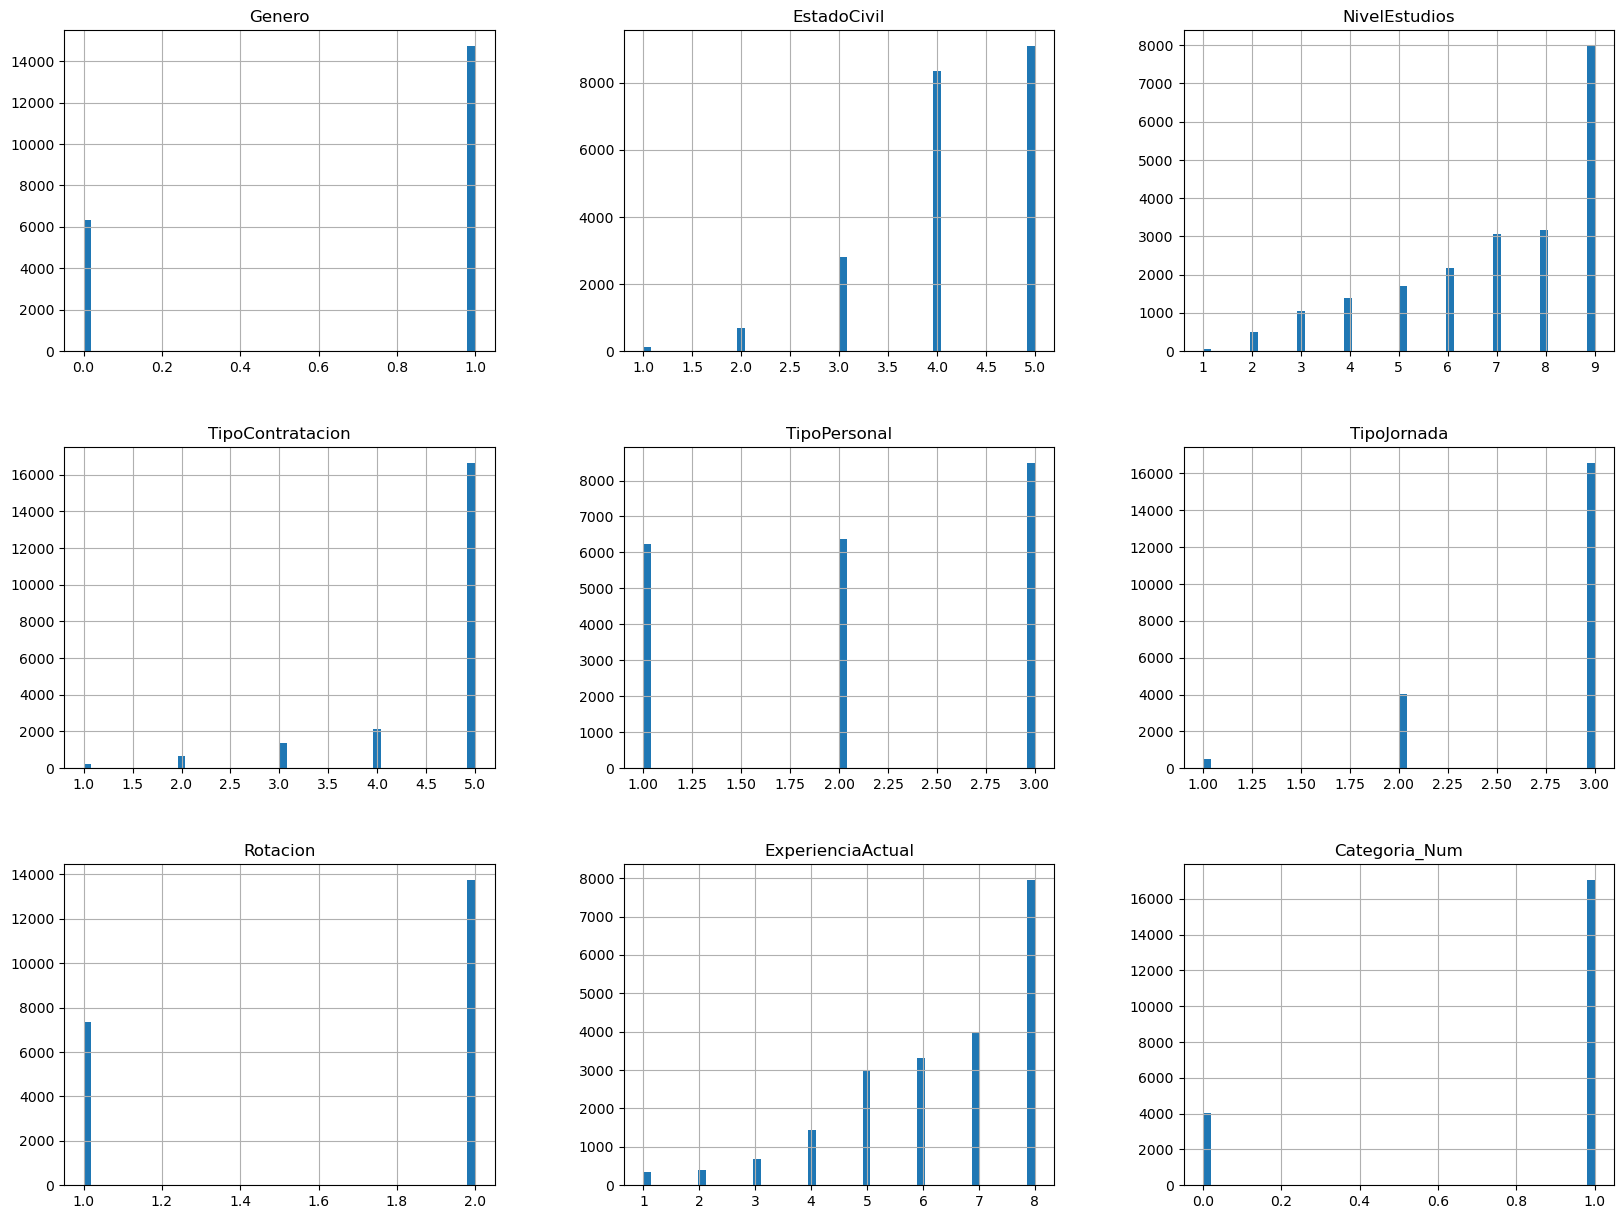

In [56]:
#Hacer un histograma de todas las variables numericas
df_resultados.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:xlabel='Genero', ylabel='Genero'>,
        <AxesSubplot:xlabel='EstadoCivil', ylabel='Genero'>,
        <AxesSubplot:xlabel='NivelEstudios', ylabel='Genero'>,
        <AxesSubplot:xlabel='TipoContratacion', ylabel='Genero'>,
        <AxesSubplot:xlabel='TipoPersonal', ylabel='Genero'>,
        <AxesSubplot:xlabel='TipoJornada', ylabel='Genero'>,
        <AxesSubplot:xlabel='Rotacion', ylabel='Genero'>,
        <AxesSubplot:xlabel='ExperienciaActual', ylabel='Genero'>,
        <AxesSubplot:xlabel='Categoria_Num', ylabel='Genero'>],
       [<AxesSubplot:xlabel='Genero', ylabel='EstadoCivil'>,
        <AxesSubplot:xlabel='EstadoCivil', ylabel='EstadoCivil'>,
        <AxesSubplot:xlabel='NivelEstudios', ylabel='EstadoCivil'>,
        <AxesSubplot:xlabel='TipoContratacion', ylabel='EstadoCivil'>,
        <AxesSubplot:xlabel='TipoPersonal', ylabel='EstadoCivil'>,
        <AxesSubplot:xlabel='TipoJornada', ylabel='EstadoCivil'>,
        <AxesSubplot:xlabel='Rotacion', yla

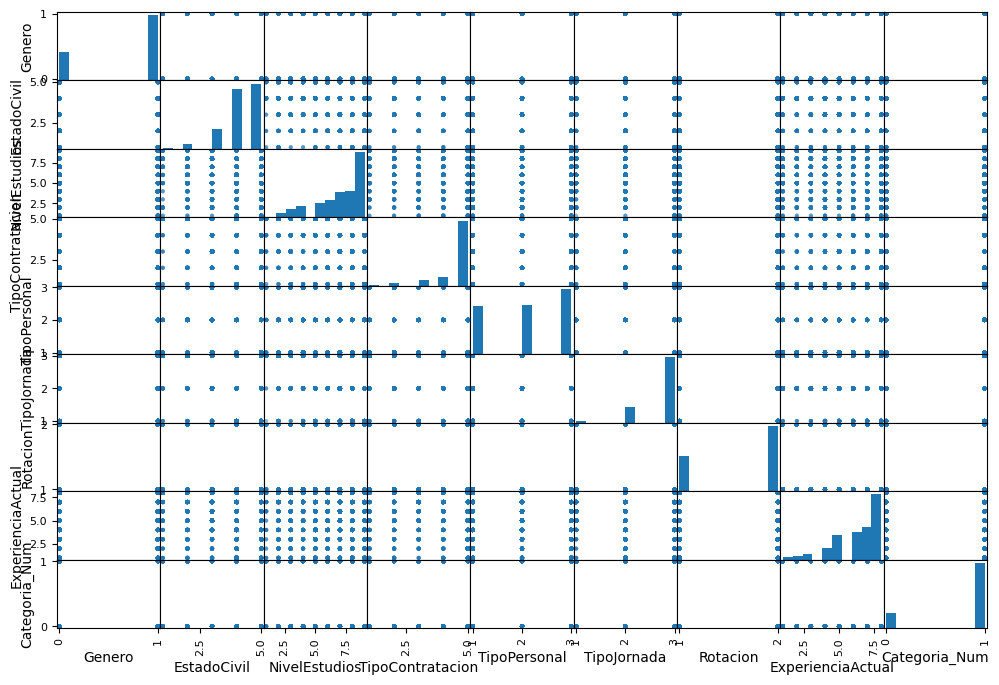

In [57]:
#Hacer diagramas de correlacion
from pandas.plotting import scatter_matrix
atributos = ['Genero', 'EstadoCivil','NivelEstudios','TipoContratacion','TipoPersonal','TipoJornada','Rotacion','ExperienciaActual','Categoria_Num']
scatter_matrix(df_resultados[atributos],figsize=(12,8))

# Coeficiente de correlación de Pearson

In [58]:
#Matriz correlacion numerica
df_resultados[atributos].corr(method='pearson').round(2)

,Genero,EstadoCivil,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual,Categoria_Num
Genero,1.00,-0.05,-0.07,0.03,-0.15,-0.11,-0.20,-0.05,0.06
EstadoCivil,-0.05,1.00,0.01,-0.07,-0.01,0.09,0.02,0.11,-0.02
NivelEstudios,-0.07,0.01,1.00,0.06,0.18,0.05,0.18,0.05,-0.02
TipoContratacion,0.03,-0.07,0.06,1.00,0.08,0.03,0.08,-0.02,0.02
TipoPersonal,-0.15,-0.01,0.18,0.08,1.00,0.24,0.41,0.01,-0.06
TipoJornada,-0.11,0.09,0.05,0.03,0.24,1.00,0.42,0.06,-0.06
Rotacion,-0.20,0.02,0.18,0.08,0.41,0.42,1.00,0.01,-0.10
ExperienciaActual,-0.05,0.11,0.05,-0.02,0.01,0.06,0.01,1.00,0.01
Categoria_Num,0.06,-0.02,-0.02,0.02,-0.06,-0.06,-0.10,0.01,1.00


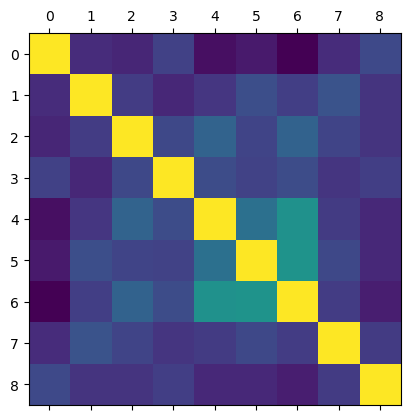

In [59]:
# Matriz correlacion visual
plt.matshow(df_resultados[atributos].corr())
plt.show()

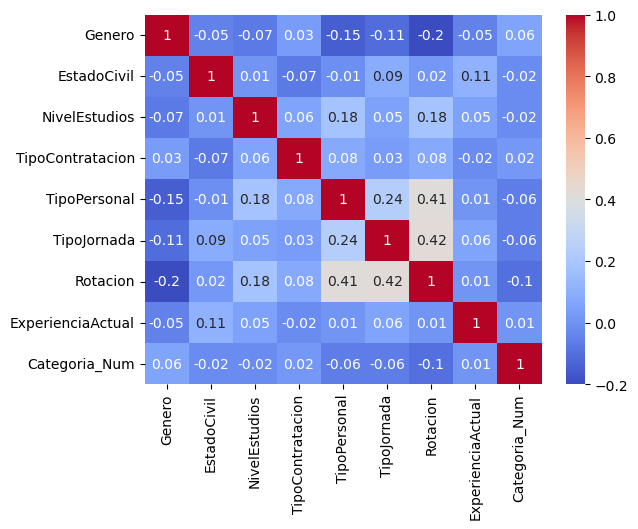

In [60]:
import seaborn as sn
corrMatrix = df_resultados[atributos].corr()
sn.heatmap(corrMatrix.round(2), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#Falta 2 df, uno solo para determinar los resultados de las personas por las respuestas de las preguntas y el otro agregando esos resultados al df_e
#Falta 1 df, sin agregar los resultados de la norma 035 

# Preparar los datos para los algoritmos de Machine Learning

In [61]:
import joblib

In [62]:
#Crear X (Quitar la columna "Categoria_Num")
X=df_resultados.drop('Categoria_Num',axis=1)
X

,Genero,EstadoCivil,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
0,1,4,3,5,1,3,1,8
1,1,5,9,5,1,3,2,8
2,1,5,4,4,1,3,1,7
3,1,5,9,5,2,3,1,6
4,0,4,9,2,3,3,2,3
...,...,...,...,...,...,...,...,...
21094,0,3,2,5,2,3,2,8
21095,0,3,8,5,2,3,2,5
21096,0,3,8,5,2,3,2,5
21097,0,5,7,5,2,3,2,7


In [63]:
#Crear y (valor de la columna "Categoria_Num") 
y=df_resultados['Categoria_Num']
y

0        1
1        1
2        1
3        0
4        1
        ..
21094    1
21095    1
21096    1
21097    1
21098    1
Name: Categoria_Num, Length: 21099, dtype: int64

In [64]:
#Dividir los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [65]:
#Revisar el tamaño de cada muestra
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16879, 8), (4220, 8), (16879,), (4220,))

# Seleccionar un modelo y realizar el entrenamiento

Arbol de decision

In [66]:
# Modulos del Modelo: Arboles de decision
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [66]:
#Modelo DecisionTreeClassifier
model_tree = DecisionTreeClassifier(random_state=17, max_depth=5, min_samples_leaf=5)

In [67]:
#Ajuste del modelo
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=17)

In [68]:
#Prediccion
y_pred_dt = model_tree.predict(X_test)
y_pred_dt

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [69]:
#Prueba en y_test
y_test.values

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [70]:
#Score
np.equal(y_pred_dt, y_test.values)

array([ True,  True, False, ...,  True,  True,  True])

In [71]:
model_tree.score(X_test, y_test)

0.8021327014218009

In [115]:
#Guardar modelo model_tree
joblib.dump(model_tree, 'modelo_model_tree_entrenado.pkl')

['modelo_model_tree_entrenado.pkl']

In [72]:
#El modelo Decision Tree proporciona un atributo 'feature_importances_' que te permite
#acceder a la importancia de cada caracteristica en el modelo
importances_dt = model_tree.feature_importances_

In [73]:
#Combinar la importancia de las caracteristicas con sus nombres y ordena por importancia
feature_importance_df_dt = pd.DataFrame({'Feature':X_train.columns, 'Importance':importances_dt})
feature_importance_df_dt = feature_importance_df_dt.sort_values(by='Importance', ascending=False)

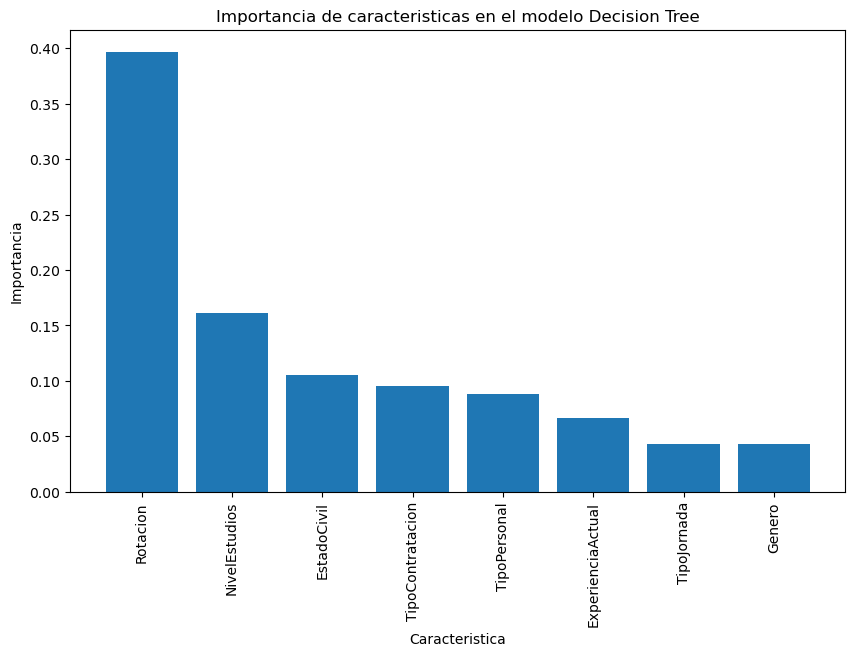

In [74]:
#Visualizar la importancia de las caracteristicas con grafica de barras

plt.figure(figsize=(10,6))
plt.bar(range(len(feature_importance_df_dt)), feature_importance_df_dt['Importance'], tick_label=feature_importance_df_dt['Feature'])
plt.xticks(rotation=90)
plt.xlabel('Caracteristica')
plt.ylabel('Importancia')
plt.title('Importancia de caracteristicas en el modelo Decision Tree')
plt.show()

# Afinar el modelo

In [75]:
#Ajuste de los parametros max_depth y min_samples_leaf

for j in range(1,8,2):
    for i in range(1,8,2):
        print(f'Modelo con {i} max_depth, {j} min_samples_leaf')
        model_tree = DecisionTreeClassifier(random_state=17, max_depth=i, min_samples_leaf=j)
        model_tree.fit(X_train, y_train)
        print(f'Precision:{ model_tree.score(X_test, y_test) }')
        print('.....')

DecisionTreeClassifier(random_state=17, max_depth=i, min_samples_leaf=j)

Modelo con 1 max_depth, 1 min_samples_leaf
Precision:0.8033175355450237
.....
Modelo con 3 max_depth, 1 min_samples_leaf
Precision:0.8033175355450237
.....
Modelo con 5 max_depth, 1 min_samples_leaf
Precision:0.8016587677725119
.....
Modelo con 7 max_depth, 1 min_samples_leaf
Precision:0.797867298578199
.....
Modelo con 1 max_depth, 3 min_samples_leaf
Precision:0.8033175355450237
.....
Modelo con 3 max_depth, 3 min_samples_leaf
Precision:0.8033175355450237
.....
Modelo con 5 max_depth, 3 min_samples_leaf
Precision:0.8016587677725119
.....
Modelo con 7 max_depth, 3 min_samples_leaf
Precision:0.7985781990521327
.....
Modelo con 1 max_depth, 5 min_samples_leaf
Precision:0.8033175355450237
.....
Modelo con 3 max_depth, 5 min_samples_leaf
Precision:0.8033175355450237
.....
Modelo con 5 max_depth, 5 min_samples_leaf
Precision:0.8021327014218009
.....
Modelo con 7 max_depth, 5 min_samples_leaf
Precision:0.7997630331753555
.....
Modelo con 1 max_depth, 7 min_samples_leaf
Precision:0.8033175355

DecisionTreeClassifier(max_depth=7, min_samples_leaf=7, random_state=17)

# Seleccionar un modelo y realizar el entrenamiento

In [76]:
#Modelo RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
#Modelo
model_forest = RandomForestClassifier(random_state=17, max_depth=5, n_estimators=10)

In [78]:
#Ajuste del modelo
model_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=17)

In [79]:
#Prediccion
y_pred_rf = model_forest.predict(X_test)
y_pred_rf

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [80]:
#Comparacion
np.equal(y_pred_rf, y_test.values)

array([ True,  True, False, ...,  True,  True,  True])

In [81]:
#Score
model_forest.score(X_test, y_test)

0.8033175355450237

In [114]:
#Guardar modelo model_forest
joblib.dump(model_forest, 'modelo_model_forest_entrenado.pkl')

['modelo_model_forest_entrenado.pkl']

In [82]:
importances = model_forest.feature_importances_

In [83]:
feature_importance_df = pd.DataFrame({'Feature':X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

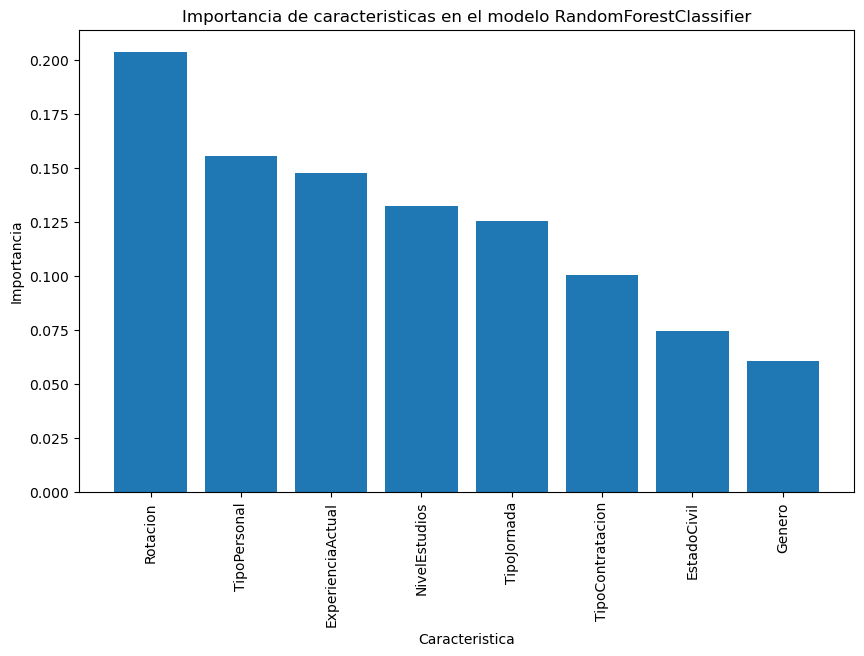

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(range(len(feature_importance_df)), feature_importance_df['Importance'], tick_label=feature_importance_df['Feature'])
plt.xticks(rotation=90)
plt.xlabel('Caracteristica')
plt.ylabel('Importancia')
plt.title('Importancia de caracteristicas en el modelo RandomForestClassifier')
plt.show()

# Afinar el modelo

In [89]:
# RandomForestClassifier(random_state=17, max_depth=5, n_estimators=i )
for i in range (10,50,10):
    print(f'Modelo con n_estimators = {i}')
    model_forest=RandomForestClassifier(random_state=17, max_depth=5, n_estimators=i )
    model_forest.fit(X_train, y_train)
    print(f'Precision: {model_forest.score(X_test, y_test)}')
    print('.....')

Modelo con n_estimators = 10
Precision: 0.814218009478673
.....
Modelo con n_estimators = 20
Precision: 0.814218009478673
.....
Modelo con n_estimators = 30
Precision: 0.814218009478673
.....
Modelo con n_estimators = 40
Precision: 0.814218009478673
.....


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Regresion Logística

In [68]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Prediccion
y_pred_lr = logreg.predict(X_test)
y_pred_lr

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [69]:
#Comparacion
np.equal(y_pred_lr, y_test.values)

array([ True,  True,  True, ...,  True,  True,  True])

In [70]:
#Score
logreg.score(X_test, y_test)

0.7995260663507109

# Otra Forma

In [79]:
#Realiza la codificacion one-hot en la columna "NivelEstudios"
df_encoded = pd.get_dummies(df_resultados, columns=["NivelEstudios"])

In [81]:
#Separar los datos en caracteristicas (X) y variable de respuesta (y) 
XX = df_encoded.drop("Categoria_Num", axis=1)
yy = df_encoded["Categoria_Num"]

In [82]:
#Dividir datos en conjuntos de entrenamiento y prueba
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2, random_state=42)

In [83]:
#Crear y ajustar el modelo de regresion logistica
modell = LogisticRegression()
modell.fit(XX_train, yy_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
#Obtener los coeficientes del modelo
coeficientess = modell.coef_[0]

In [85]:
#Crear un DataFrame con las columnas y los coeficientes correspondientes
coeficientes_dff = pd.DataFrame({"Feature":XX.columns, "Coefficient": coeficientess})

In [86]:
#Filtrar las filas donde las caracteristicas son de "NivelEstudios"
nivel_estudios_coef = coeficientes_dff[coeficientes_dff["Feature"].str.startswith("NivelEstudios")]

In [87]:
#Ordenar los coeficientes para ver la influencia de cada valor unico de "NivelEstudios"
nivel_estudios_coef = nivel_estudios_coef.sort_values(by="Coefficient", ascending=False)

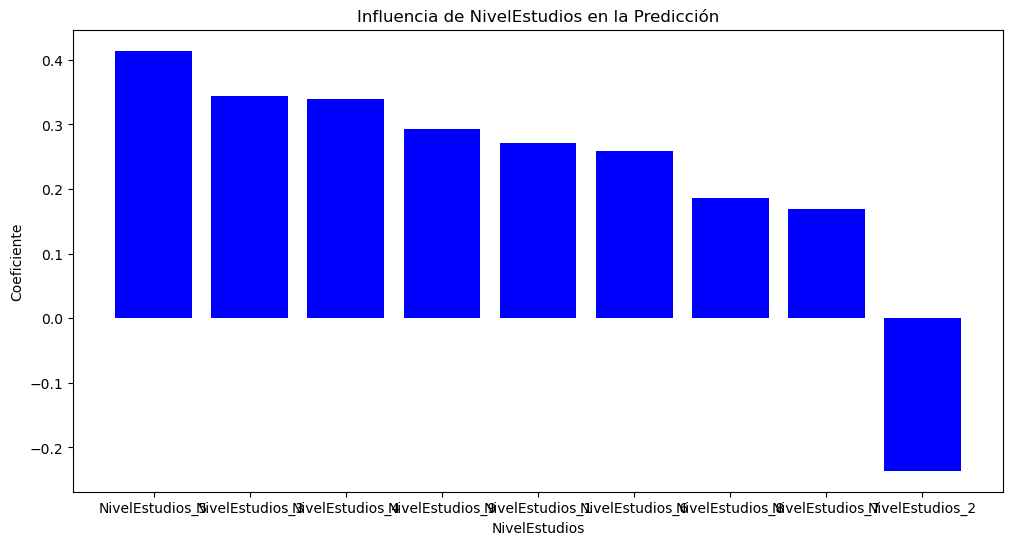

In [121]:
# Visualizar la relación con más espacio entre las barras
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
plt.bar(nivel_estudios_coef["Feature"], nivel_estudios_coef["Coefficient"], color='blue')  # Utilizar Feature en lugar de NivelEstudios
plt.xlabel("NivelEstudios")
plt.ylabel("Coeficiente")
plt.title("Influencia de NivelEstudios en la Predicción")
plt.show()

In [88]:
#Mostrar el resultado
print(nivel_estudios_coef)

            Feature  Coefficient
11  NivelEstudios_5     0.414167
9   NivelEstudios_3     0.343554
10  NivelEstudios_4     0.338499
15  NivelEstudios_9     0.293073
7   NivelEstudios_1     0.270468
12  NivelEstudios_6     0.259147
14  NivelEstudios_8     0.186225
13  NivelEstudios_7     0.169564
8   NivelEstudios_2    -0.235970


# One Shot

Para ver como cada valor unico de la columna "NivelEstudios" se relaciona con el modelo entrenado

In [93]:
# Realizar codificación one-hot en la columna "NivelEstudios"
df_encoded2 = pd.get_dummies(df_resultados, columns=["NivelEstudios"])

In [94]:
# Separar tus datos en características (X) y variable de respuesta (y)
X2 = df_encoded2.drop("Categoria_Num", axis=1)
y2 = df_encoded2["Categoria_Num"]

In [95]:
# Dividir tus datos en conjuntos de entrenamiento y prueba
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [96]:
# Crear y ajustar el modelo de regresión logística
modell2 = LogisticRegression()
modell2.fit(X2_train, y2_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
#Obtener las probabilidades predichas para cada clase (0 y 1)
probabilidades_predichas = modell2.predict_proba(X2_test)[:, 1]

In [122]:
#Filtrar las columnas que comienzan con "NivelEstudios"
columnas_nivel_estudios = X2_test.filter(like="NivelEstudios_")

In [123]:
#Crear DataFrame con las columnas "NivelEstudios" y las probabilidades predichas
df_resul = pd.DataFrame({
    "NivelEstudios": columnas_nivel_estudios.columns, 
    "Probabilidad_Prediccion": probabilidades_predichas[:len(columnas_nivel_estudios.columns)]
    })

In [124]:
#Calcular la media de las probabilidades predichas para cada valor unico de "NivelEstudios"
media_probabilidades = df_resul.groupby("NivelEstudios")["Probabilidad_Prediccion"].mean().reset_index()

In [125]:
# Ordenar por la media de probabilidades para visualización
media_probabilidades = media_probabilidades.sort_values(by="Probabilidad_Prediccion", ascending=False)

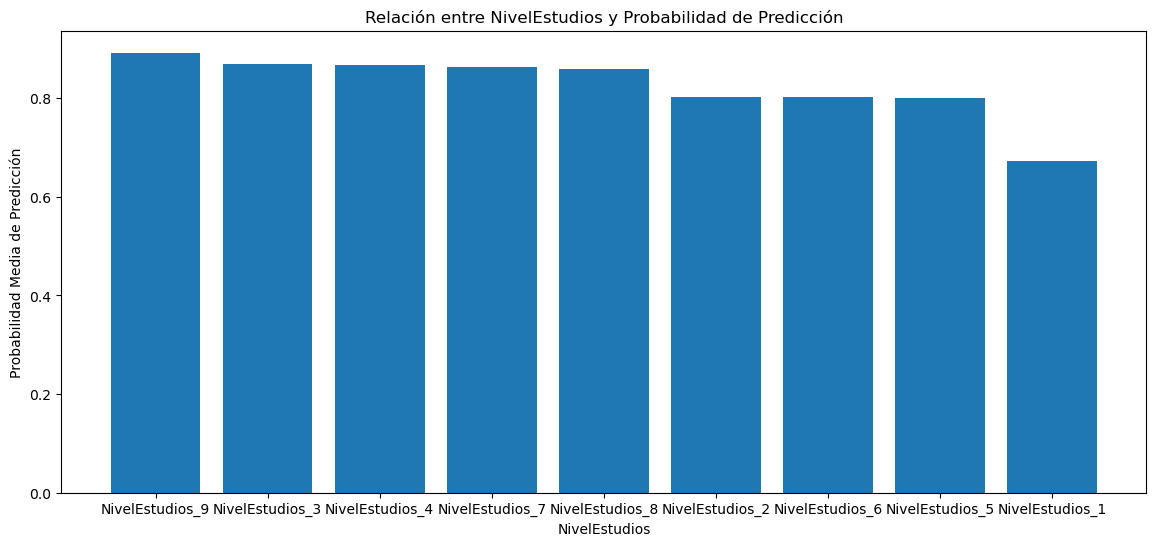

In [126]:
# Visualizar la relación
plt.figure(figsize=(14, 6))
plt.bar(media_probabilidades["NivelEstudios"], media_probabilidades["Probabilidad_Prediccion"], width=0.8)
plt.xlabel("NivelEstudios")
plt.ylabel("Probabilidad Media de Predicción")
plt.title("Relación entre NivelEstudios y Probabilidad de Predicción")
plt.show()

# Columna NivelEstudios

In [124]:
# Crear un DataFrame de ejemplo con la columna "Nivel de Estudios" codificada como números enteros del 1 al 9
data = {
    "NivelEstudios": [3, 2, 4, 6, 7, 8, 9, 1, 5]
}

In [125]:
df = pd.DataFrame(data)

In [127]:
# Realizar codificación one-hot solo para la columna "Nivel de Estudios"
df_encoded = pd.get_dummies(df, columns=["NivelEstudios"], prefix="Nivel")

In [130]:
X = df_encoded
y = [3, 2, 4, 6, 7, 8, 9, 1, 5]

In [131]:
logreg.fit(X, y)

LogisticRegression()

In [132]:
#Analizar la importancia de caracteristicas
importance = logreg.coef_[0]
feature_names = X.columns
for feature, coef in zip(feature_names, importance):
    print(f"{feature}: {coef}")

Nivel_1: 0.7707196780288318
Nivel_2: -0.096339959753604
Nivel_3: -0.096339959753604
Nivel_4: -0.096339959753604
Nivel_5: -0.09633995975360397
Nivel_6: -0.09633995975360397
Nivel_7: -0.09633995975360397
Nivel_8: -0.09633995975360397
Nivel_9: -0.09633995975360397


# Otra manera

In [144]:
coeficientes = logreg.coef_

In [229]:
data_9 = {
    "NivelEstudios": [1, 2, 3, 4, 5, 6, 7, 8, 9]
}

df_9 = pd.DataFrame(data)

In [230]:
# Obtener los valores únicos de "NivelEstudios" desde tu DataFrame original
unique_niveles = df_9['NivelEstudios'].unique()

In [232]:
# Crear un diccionario para mapear los valores de "NivelEstudios" a los coeficientes
coef_dict = {nivel: coeficientes[0][unique_niveles.tolist().index(nivel)] for nivel in unique_niveles}

IndexError: index 8 is out of bounds for axis 0 with size 8

In [175]:
# Crear un DataFrame con todos los valores posibles de "NivelEstudios"
niveles_posibles = [1, 2, 3, 4, 5, 6, 7, 8, 9]
coef_df = pd.DataFrame({'NivelEstudios': niveles_posibles})

In [187]:
# Inicializar los coeficientes en cero
coef_df['Coeficiente'] = 0.0

In [182]:
# Ordenar los valores por la magnitud de los coeficientes en orden descendente
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)

In [183]:
#Imprimir el DataFrame resultante
print(coef_df)

   NivelEstudios  Coeficiente
8              2     1.000000
0              3     0.195378
3              5     0.092062
7              1     0.014789
2              4     0.002451
1              9    -0.052233
4              7    -0.085663
5              6    -0.115653
6              8    -0.438211


In [113]:
#Guardar modelo logreg
joblib.dump(logreg, 'modelo_logreg_entrenado.pkl')

['modelo_logreg_entrenado.pkl']

In [89]:
#Los coeficientes de las caracteristicas en este modelo se obtienen con el atributo 'coef_'
#Estos coeficientes representan la importancia de cada caracteristica
coefficients = logreg.coef_[0] # [0] se utiliza para acceder a los coeficientes de la única clase en problemas de clasificación binaria

In [90]:
#Combina los coeficientes de las caracteristicas con sus nombres y se ordenan por valor absoluto
feature_importance_df_logreg = pd.DataFrame({'Feature':X_train.columns, 'Coefficient':coefficients})
feature_importance_df_logreg['Absolute Coefficient'] = abs(feature_importance_df_logreg['Coefficient'])
feature_importance_df_logreg = feature_importance_df_logreg.sort_values(by='Absolute Coefficient', ascending=False)

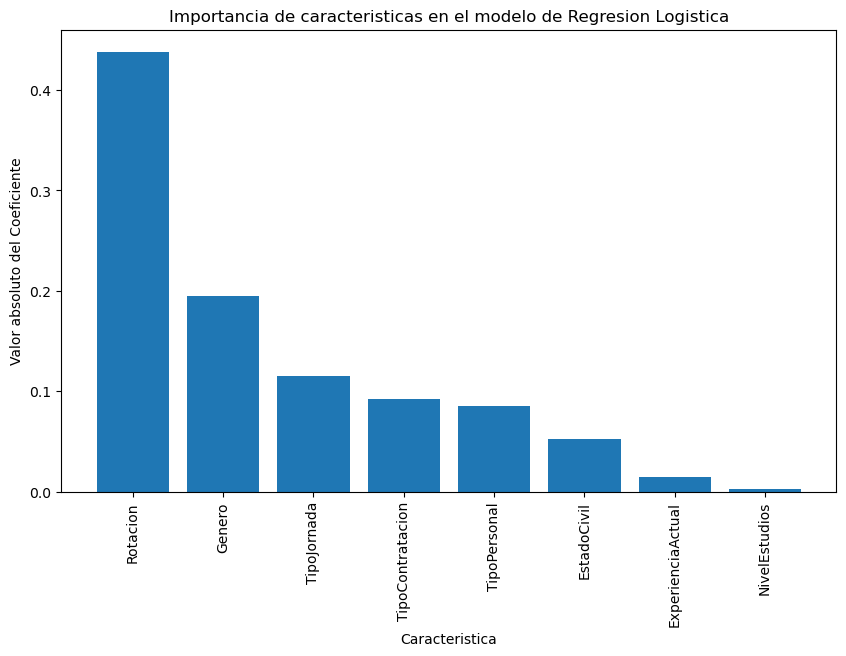

In [91]:
#Se visualiza la importancia de las caracteristicas con grafica de barras

plt.figure(figsize=(10,6))
plt.bar(range(len(feature_importance_df_logreg)), feature_importance_df_logreg['Absolute Coefficient'], tick_label=feature_importance_df_logreg['Feature'])
plt.xticks(rotation=90)
plt.xlabel('Caracteristica')
plt.ylabel('Valor absoluto del Coeficiente')
plt.title('Importancia de caracteristicas en el modelo de Regresion Logistica')
plt.show()

Support Vector Machine

In [92]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)
y_pred_svm

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [93]:
#Comparacion
np.equal(y_pred_svm, y_test.values)

array([ True,  True, False, ...,  True,  True,  True])

In [94]:
#Score
svc.score(X_test, y_test)

0.8033175355450237

In [95]:
#Se obtiene los indices de los vectores de soporte a con el atributo 'support_'
support_indices = svc.support_

In [96]:
#Se calcula la importancia de las caracteristicas, esto examinando los coeficientes del hiperplano de decision asociados con  los vectores de soporte usando el atributo 'coef_' del modelo SVM
importances_svc  =svc.coef_[0]

In [97]:
#Se combina las importancias de las caracteristicas con sus nombres y se ordenan por valor absoluto
feature_importance_svc = pd.DataFrame({'Feature':X_train.columns, 'Importance': importances_svc})
feature_importance_svc['Absolute Importance'] = abs(feature_importance_svc['Importance'])
feature_importance_svc = feature_importance_svc.sort_values(by='Absolute Importance', ascending=False)

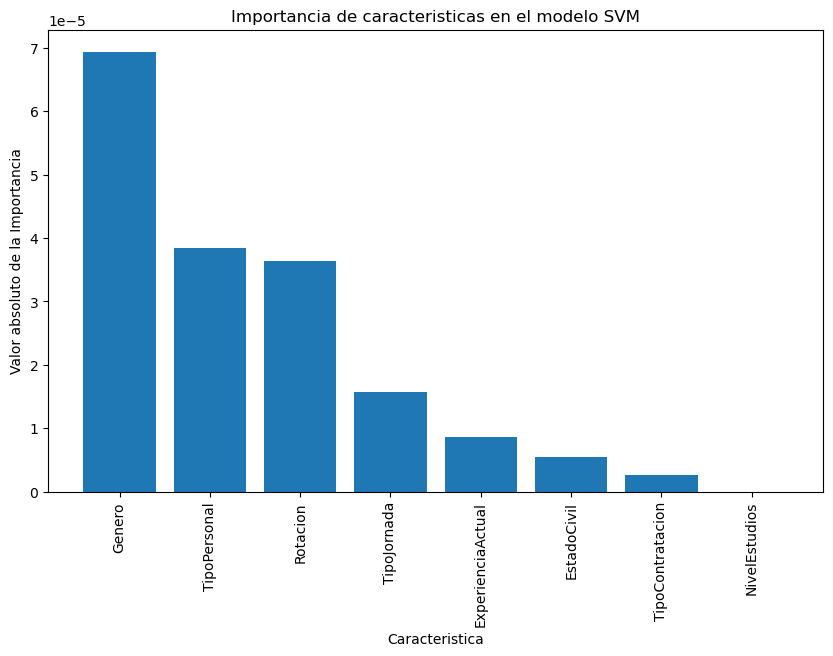

In [98]:
#Se visualiza la importancia de las caracteristicas con grafica de barras
plt.figure(figsize=(10,6))
plt.bar(range(len(feature_importance_svc)), feature_importance_svc['Absolute Importance'], tick_label=feature_importance_svc['Feature'])
plt.xticks(rotation=90)
plt.xlabel('Caracteristica')
plt.ylabel('Valor absoluto de la Importancia')
plt.title('Importancia de caracteristicas en el modelo SVM')
plt.show()

In [101]:
#Guardar modelo entrenado
joblib.dump(svc, 'modelo_entrenado_svc.pkl')

['modelo_entrenado_svc.pkl']

K neighbors

In [102]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [103]:
#Comparacion
np.equal(y_pred_knn, y_test.values)

array([ True,  True, False, ...,  True,  True,  True])

In [104]:
#Score
knn.score(X_test, y_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7971563981042654

In [105]:
from sklearn.feature_selection import SelectKBest, f_classif

In [106]:
#Crea un selector de características basado en puntuación F
selector = SelectKBest(score_func=f_classif, k='all')

In [107]:
#Ajusta el selector a tus datos y etiquetas
X_new = selector.fit_transform(X_train, y_train)

In [108]:
#Obtiene las puntuaciones F para cada característica
scores = selector.scores_

In [109]:
#Se combinan las puntuaciones de características con sus nombres y se ordenan
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'F-Score': scores})
feature_importance_df = feature_importance_df.sort_values(by='F-Score', ascending=False)

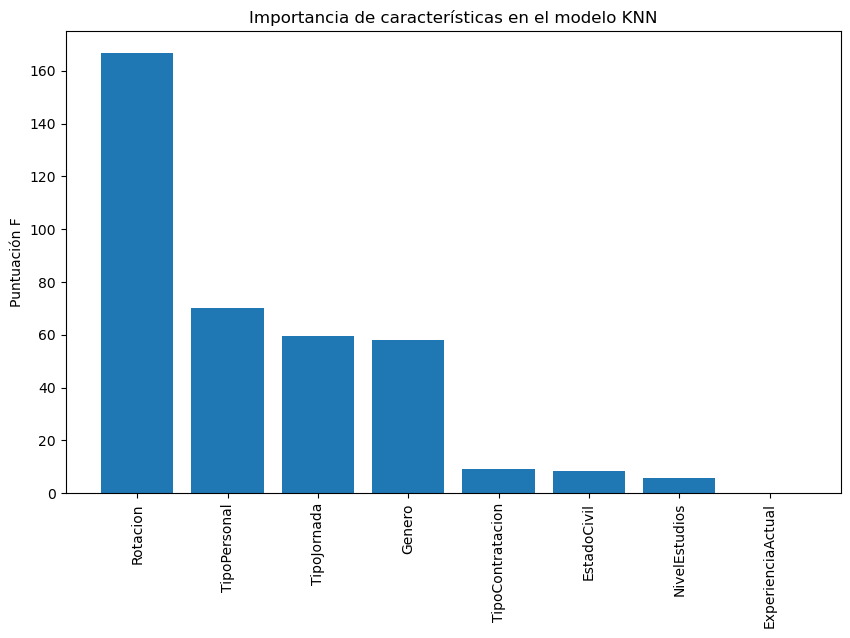

In [110]:

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_df)), feature_importance_df['F-Score'])
plt.xticks(range(len(feature_importance_df)), feature_importance_df['Feature'], rotation=90)
plt.ylabel('Puntuación F')
plt.title('Importancia de características en el modelo KNN')
plt.show()

In [111]:
#Guardar el modelo knn
joblib.dump(knn, 'modelo_knn_entrenado.pkl')

['modelo_knn_entrenado.pkl']

# Sensibilidad (Recall)

In [236]:
from sklearn.metrics import recall_score

recall_dt = recall_score(y_test, y_pred_dt)
recall_rf = recall_score(y_test, y_pred_rf)
recall_lr = recall_score(y_test, y_pred_lr)
recall_svm = recall_score(y_test, y_pred_svm)
recall_knn = recall_score(y_test, y_pred_knn)


# Precision Positiva

In [240]:
from sklearn.metrics import precision_score

precision_dt = precision_score(y_test, y_pred_dt)
precision_rf = precision_score(y_test, y_pred_rf)
precision_lr = precision_score(y_test, y_pred_lr)
precision_svm = precision_score(y_test, y_pred_svm)
precision_knn = precision_score(y_test, y_pred_knn)

# Matriz de Confusion

In [246]:
from sklearn.metrics import confusion_matrix

confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Curva ROC y AUC

In [252]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_pred_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_lr)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_pred_svm)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_knn)